### **Bosques aleatorios**

Están relacinados con los árboles de decisión. <br>
Un bosque aleatorio se construye con múltiples árboles de decisión y los combina para obtener una predicción más robusta y precisa. <br>
Cada árbol se entrena con una muestra diferente del conjunto de datosy selecciona un subconjunto aleatorio de características para dividir en cada nodo.


                   Conjunto de Datos                    
 
    |  Muestra Aleatoria 1   |  Muestra Aleatoria 2     |
    | (Entrenamiento Árbol 1)| (Entrenamiento Árbol 2)  |
    +------------------------+--------------------------+
             |                           |
          Árbol de                   Árbol de
         Decisión 1                 Decisión 2
             |                           |
    +----------+-----------+   +-----------+-----------+
    | Selección Aleatoria  |   | Selección Aleatoria  |
    | de Características  |    | de Características  |
    | para Divisiones     |    | para Divisiones     |
    +----------+-----------+   +-----------+-----------+
               |                           |
     +---------+---------+       +---------+---------+
     | Predicción de    |       | Predicción de    |
     | Árbol 1          |       | Árbol 2          |
     +---------+---------+       +---------+---------+
               |                           |
        +------+---------------------------+------+
        |          Votación Promediada            |
        |         de Todos los Árboles            |
        +---------------------------------------+
                                 |
                         Predicción Final



`EJEMPLOS DE USO`

Detección de fraudes: <br>
Variables: detalles de transacciones, patrones de comportamiento del usuario, etc. <br>
Objetivo: Identificar transacciones fraudulentas. <br>
Uso: Seguridad en sistemas de pagos electrónicos. <br>


In [ ]:
!pip3 install numpy pandas matplotlib scikit-learn imbalanced-learn

In [1]:
# Importar las bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

print("Todas las bibliotecas se importaron correctamente.")

Todas las bibliotecas se importaron correctamente.


In [2]:
# Generar datos sintéticos para segmentación de mercado
np.random.seed(42)
n = 100
# Factores a tomar en cuenta para la segmentacion de mercado
# - edad: entre 18 y 70 años
# - ingreso: entre 20000 y 120000
# - ha comprado antes: si o no
# - compra: sí o no

# Tenemos dos data sets, uno con un patrón muy claro y otro completamente aleatorio, esto es útil para observar como varía la
# precisión en las predicciones

# Aqui podemos ver un patron muy claro de compra
# ingresos = np.random.randint(20000, 100000, n)
# edad = np.random.randint(18, 70, n)
# ha_comprado_antes = np.random.randint(0, 2, n)
# comprara = []
# for i in range(n):
#     if ingresos[i] > 70000:
#         if edad[i] >= 40:
#             comprara.append(1)  # Sí
#         else:
#             comprara.append(0)  # No
#     else:
#         if ha_comprado_antes[i] == 1:
#             comprara.append(1)  # Sí
#         else:
#             comprara.append(0)  # No
            
# data = {
#     'Edad': edad,
#     'Ingresos': ingresos,
#     'HaCompradoAntes': ha_comprado_antes,
#     'Comprará': comprara
# }

# Aquí tenemos un dataset con valores totalmente aleatorios, la exactitud debería bajar considerablemente
ingresos = np.random.randint(20000, 120000, n)
edad = np.random.randint(18, 70, n)
ha_comprado_antes = np.random.choice([0, 1], n)
comprara = np.random.choice(['Sí', 'No'], n)

# Crear DataFrame
data = {
    'Edad': edad,
    'Ingresos': ingresos,
    'HaCompradoAntes': ha_comprado_antes,
    'Comprará': comprara
}

# Convertir el dataset en un DataFrame de pandas
df= pd.DataFrame(data)

# Guardar a CSV
df.to_csv('segmentacion_mercado.csv', index=False)


In [3]:
# Cargar datos
data = pd.read_csv('segmentacion_mercado.csv')

# Mostrar las primeras filas
print(data.head())

# # Estadísticas descriptivas
# # count: valores no nulos
# # mean: promedio (suma de los valores de cada columna entre numero de filas)
# # std: desviación estandar
# # min: valor minimo por columna
# # 25%: el 25% de las casa están por debajo de esos valores
# # 50%: el 50% de las casa están por debajo de esos valores
# # 75%: el 75% de las casa están por debajo de esos valores
# # max: valor máximo por columna
print(data.describe())

   Edad  Ingresos  HaCompradoAntes Comprará
0    26     35795                1       Sí
1    41     20860                0       Sí
2    18     96820                0       No
3    61     74886                0       Sí
4    25     26265                1       Sí
             Edad       Ingresos  HaCompradoAntes
count  100.000000     100.000000       100.000000
mean    43.220000   72368.890000         0.530000
std     14.948112   28730.338066         0.501614
min     18.000000   20769.000000         0.000000
25%     29.750000   47934.250000         0.000000
50%     45.000000   78018.000000         1.000000
75%     56.000000   96619.000000         1.000000
max     69.000000  119299.000000         1.000000


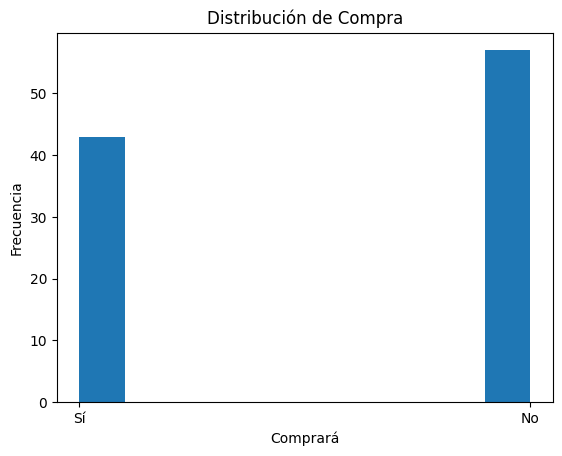

In [4]:
# Distribución de compra
plt.hist(data['Comprará'])
plt.xlabel('Comprará')
plt.ylabel('Frecuencia')
plt.title('Distribución de Compra')
plt.show()

# Codificar las variables categóricas
label_encoder = LabelEncoder()
data['HaCompradoAntes'] = label_encoder.fit_transform(data['HaCompradoAntes'])
data['Comprará'] = label_encoder.fit_transform(data['Comprará'])

# Aqui podemos ver una gráfica, donde en el eje x estan las opciones ('Sí' y 'No') 
# En el eje y vemos la frecuencia de cada categoría en los datos. 
# La frecuencia indica cuántas veces aparece cada categoría en un conjunto de datos.

In [5]:
# Características que vamos a tener en cuenta para entrenar el modelo
X = df[['Edad', 'Ingresos', 'HaCompradoAntes']]
y = df['Comprará']

# Dividir en conjuntos de entrenamiento y prueba
# X variables que se usarán para la predicción
# y variable que queremos predecir
# test_size=0.2: indica que usaremos el 20% de los datos para el conjunto de prueba y el 80% para el conjunto de entrenamiento
# Conjunto de entrenamiento se usa para entrenar el modelo, se usa para enseñar al modelo la relacion entre los patrones en los datos (mientras mas, mejor)
# Conjunto de prueba se usa para comparar las predicciones y ver que tan acertadas son
# random_state: se utiliza para controlar cómo se dividen los datos aleatorios. Si dos personas ejecutan la misma función con el mismo valor para random_state, 
#   obtendrán exactamente la misma división de datos (pruebas y entrenamiento).
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Predecir en el conjunto de prueba
y_pred_rf = model.predict(X_test)

# Evaluar el modelo
print("Bosque Aleatorio - Exactitud:", accuracy_score(y_test, y_pred_rf))
print("Bosque Aleatorio - Reporte de clasificación:\n", classification_report(y_test, y_pred_rf))
print("Bosque Aleatorio - Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))

Bosque Aleatorio - Exactitud: 0.4666666666666667
Bosque Aleatorio - Reporte de clasificación:
               precision    recall  f1-score   support

          No       0.56      0.50      0.53        18
          Sí       0.36      0.42      0.38        12

    accuracy                           0.47        30
   macro avg       0.46      0.46      0.46        30
weighted avg       0.48      0.47      0.47        30

Bosque Aleatorio - Matriz de confusión:
 [[9 9]
 [7 5]]


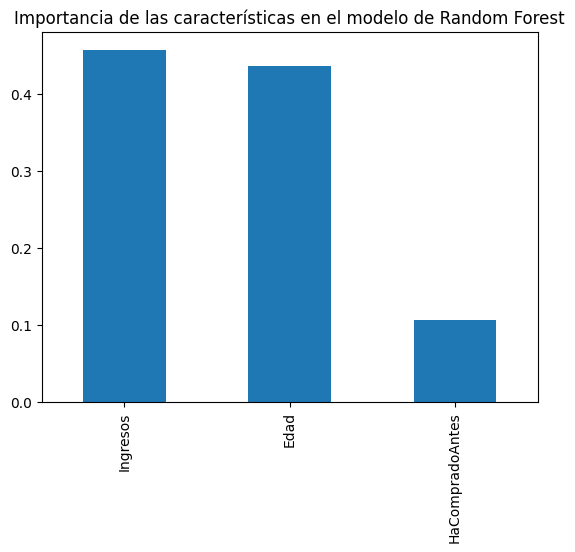

In [8]:
# Importancia de las características
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Visualizar la importancia de las características
feature_importances.plot(kind='bar')
plt.title('Importancia de las características en el modelo de Random Forest')
plt.show()